In [39]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv('wx_user.csv')

In [41]:
df.head()

,user_id,follow_time,auth_time,createtime,order_no,paid_cash,create_date
0,2,2023/3/9 14:36:14,2014/8/3 22:39:25,2014/4/30 09:30:23,2.018123e+14,1.0,2018/12/29
1,2,2023/3/9 14:36:14,2014/8/3 22:39:25,2014/4/30 09:30:23,2.021012e+14,50.0,2021/1/15
2,2,2023/3/9 14:36:14,2014/8/3 22:39:25,2014/4/30 09:30:23,2.018110e+14,1.0,2018/11/2
3,2,2023/3/9 14:36:14,2014/8/3 22:39:25,2014/4/30 09:30:23,2.018122e+14,1.0,2018/12/23
4,2,2023/3/9 14:36:14,2014/8/3 22:39:25,2014/4/30 09:30:23,2.018121e+14,1.0,2018/12/7


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738066 entries, 0 to 738065
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      738066 non-null  int64  
 1   follow_time  738066 non-null  object 
 2   auth_time    730518 non-null  object 
 3   createtime   738066 non-null  object 
 4   order_no     700123 non-null  float64
 5   paid_cash    700123 non-null  float64
 6   create_date  700123 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 39.4+ MB


In [43]:
df.drop_duplicates(subset='order_no', inplace=True)
df.describe()

,user_id,order_no,paid_cash
count,700124.000000,7.001230e+05,700123.000000
mean,192485.010128,2.020049e+14,957.785317
std,186695.609254,1.762840e+11,3498.456584
min,2.000000,2.016052e+14,0.010000
25%,39286.000000,2.019023e+14,12.000000
50%,115615.000000,2.020111e+14,40.000000
75%,329243.000000,2.021102e+14,300.000000
max,761984.000000,2.023092e+14,460000.000000


In [44]:
df['paid_cash'].sum()

670567529.3700001

In [45]:
df['user_id'].nunique()

72737

In [46]:
df.isna().sum()

user_id          0
follow_time      0
auth_time      148
createtime       0
order_no         1
paid_cash        1
create_date      1
dtype: int64

In [47]:
# 按年聚合查看每年新增的好友数量及好友的注册年份分布
# 将'follow_time' 'auth_time'和转变成 datetime
df['auth_time']  = pd.to_datetime(df['auth_time'], format='%Y/%m/%d')
df['follow_time'] = pd.to_datetime(df['follow_time'], format='%Y/%m/%d')

#提取年份并创建新列
df['auth_year'] = df['auth_time'].dt.year
df['follow_year'] = df['follow_time'].dt.year

# 按'follow_time' 和 'auth_time'列分组，并对user_id进行去重统计
user_count_per_year = df.groupby(['auth_year', 'follow_year'])['user_id'].nunique().reset_index()

print(user_count_per_year)

    auth_year  follow_year  user_id
0      2014.0         2020       95
1      2014.0         2021      259
2      2014.0         2022      268
3      2014.0         2023       69
4      2015.0         2020      538
5      2015.0         2021     1630
6      2015.0         2022     1614
7      2015.0         2023      397
8      2016.0         2019        1
9      2016.0         2020      676
10     2016.0         2021     2305
11     2016.0         2022     2495
12     2016.0         2023      597
13     2017.0         2019        1
14     2017.0         2020      934
15     2017.0         2021     3545
16     2017.0         2022     3537
17     2017.0         2023      909
18     2018.0         2019        1
19     2018.0         2020     1213
20     2018.0         2021     5111
21     2018.0         2022     4743
22     2018.0         2023     1510
23     2019.0         2019        1
24     2019.0         2020     1210
25     2019.0         2021     6613
26     2019.0         2022  

In [10]:
# 使用pivot_table 将数据转换为二维数组
pivot_table = user_count_per_year.pivot(index='auth_year', columns='follow_year', values='user_id').fillna(0).astype(np.int64)

print(pivot_table)

follow_year  2019  2020  2021  2022  2023
auth_year                                
2014.0          0    95   259   268    69
2015.0          0   538  1630  1614   397
2016.0          1   676  2305  2495   597
2017.0          1   934  3545  3537   909
2018.0          1  1213  5111  4743  1510
2019.0          1  1210  6613  5994  1792
2020.0          0   865  5052  4624  1251
2021.0          0    25  3821  3651  1135
2022.0          0    12    53  1997  1140
2023.0          0     3     7    40   917


In [11]:
# 按照年聚合收入
# 按'follow_time' 和 'auth_time'列分组，并对paid_cash统计
paid_cash_per_year = df.groupby(['auth_year', 'follow_year'])['paid_cash'].sum().reset_index()

# 使用pivot_table 将数据转换为二维数组
pivot_cash_table = paid_cash_per_year.pivot(index='auth_year', columns='follow_year', values='paid_cash').fillna(0).astype(np.int64)

print(pivot_cash_table)

follow_year  2019      2020      2021      2022      2023
auth_year                                                
2014.0          0   2951996   4662774   2907587    529166
2015.0          0   7972790  26189572  13016413   3703820
2016.0        981   9572559  34575818  18234196   3467408
2017.0       9881  13734426  49918088  24039047   5454749
2018.0        318  15218333  59563490  30483290   5416126
2019.0        555  17426050  91206826  49420840  10096043
2020.0          0  12821856  55474417  30041985   4681189
2021.0          0    103459  27926764  19779779   2975585
2022.0          0     96453    197717   9093823   3718846
2023.0          0       909      4027    146796   3724805


In [48]:
# 将建单时间转化为 datetime
df['create_date'] = pd.to_datetime(df['create_date'], format='%Y/%m/%d')
df['create_year'] = df['create_date'].dt.year

# 按年聚合
cash_per_create_year = df.groupby(['create_year'])['paid_cash'].sum()


print(cash_per_create_year)

create_year
2016.0    3.598671e+06
2017.0    2.194627e+07
2018.0    4.104005e+07
2019.0    1.559391e+08
2020.0    1.540240e+08
2021.0    1.496043e+08
2022.0    9.640025e+07
2023.0    4.801485e+07
Name: paid_cash, dtype: float64


In [70]:
#合并学习用户数据
#读取学习用户数据
df_study = pd.read_csv('customer_learning.csv')
#通过user_id进行合并
merged_dataframe = pd.merge(df, df_study, on='user_id', how='inner')
merged_dataframe.head()

,user_id,follow_time,auth_time,createtime,order_no,paid_cash,create_date,auth_year,follow_year,create_year,action_month,watch_minute,course,broadcast,playback
0,2,2023-03-09 14:36:14,2014-08-03 22:39:25,2014/4/30 09:30:23,2.018123e+14,1.0,2018-12-29,2014.0,2023,2018.0,2021-01,15.17,0,14.17,1
1,2,2023-03-09 14:36:14,2014-08-03 22:39:25,2014/4/30 09:30:23,2.018123e+14,1.0,2018-12-29,2014.0,2023,2018.0,2021-02,11.13,0,11.13,0
2,2,2023-03-09 14:36:14,2014-08-03 22:39:25,2014/4/30 09:30:23,2.018123e+14,1.0,2018-12-29,2014.0,2023,2018.0,2021-03,20.00,0,20.00,0
3,2,2023-03-09 14:36:14,2014-08-03 22:39:25,2014/4/30 09:30:23,2.018123e+14,1.0,2018-12-29,2014.0,2023,2018.0,2021-04,96.28,1,95.28,0
4,2,2023-03-09 14:36:14,2014-08-03 22:39:25,2014/4/30 09:30:23,2.018123e+14,1.0,2018-12-29,2014.0,2023,2018.0,2021-05,1.00,0,0.00,1


In [71]:
# 删除重复的订单数据
merged_dataframe.drop_duplicates(subset='order_no', inplace=True)

In [72]:
merged_dataframe['user_id'].nunique() 

64588

In [16]:

# 按'follow_time' 和 'auth_time'列分组，并对user_id进行去重统计
user_count_per_year = merged_dataframe.groupby(['auth_year', 'follow_year'])['user_id'].nunique().reset_index()

# 使用pivot_table 将数据转换为二维数组
pivot_table = user_count_per_year.pivot(index='auth_year', columns='follow_year', values='user_id').fillna(0).astype(np.int64)

print(pivot_table)

follow_year  2019  2020  2021  2022  2023
auth_year                                
2014.0          0    79   231   230    55
2015.0          0   455  1495  1380   298
2016.0          1   568  2111  2188   446
2017.0          1   806  3262  3074   692
2018.0          1  1023  4667  4082  1124
2019.0          1  1032  6135  5330  1377
2020.0          0   668  4730  4154   957
2021.0          0    23  3663  3475   975
2022.0          0    10    46  1866   986
2023.0          0     2     5    32   789


In [17]:
# 按照年聚合收入
# 按'follow_time' 和 'auth_time'列分组，并对paid_cash统计
paid_cash_per_year = merged_dataframe.groupby(['auth_year', 'follow_year'])['paid_cash'].sum().reset_index()

# 使用pivot_table 将数据转换为二维数组
pivot_cash_table = paid_cash_per_year.pivot(index='auth_year', columns='follow_year', values='paid_cash').fillna(0).astype(np.int64)

print(pivot_cash_table)

follow_year  2019      2020      2021      2022     2023
auth_year                                               
2014.0          0   2901166   4505472   2816710   445266
2015.0          0   7669803  25304686  11483584  3301169
2016.0        981   9088576  33358415  17217868  2962033
2017.0       9881  13164919  48550618  22491796  4298063
2018.0        318  14877399  57476134  28567002  4218176
2019.0        555  16331860  87355672  46525344  7411327
2020.0          0  11246220  54078784  28648331  3456121
2021.0          0    102866  27476941  19356626  2587571
2022.0          0     96300    180861   8796862  3125173
2023.0          0       609      3620    107628  3246851


In [18]:
# 按照年聚合收入
# 按'follow_time' 和 'auth_time'列分组，并对paid_cash统计
paid_cash_create_year = df.groupby(['auth_year', 'create_year'])['paid_cash'].sum().reset_index()

# 使用pivot_table 将数据转换为二维数组
pivot_cash_create_table = paid_cash_create_year.pivot(index='auth_year', columns='create_year', values='paid_cash').fillna(0).astype(np.int64)

print(pivot_cash_create_table)

create_year   2016.0   2017.0    2018.0    2019.0    2020.0    2021.0  \
auth_year                                                               
2014.0        307866  1752091   1270319   2146863   1383264   1266861   
2015.0       1515631  6666441   7304000  12019873   7590500   6655441   
2016.0       1247142  6187711   7416512  17507425  10741270   9868464   
2017.0        515523  7101420  10855274  24615337  16193651  15521079   
2018.0          7234   210668  10787621  35666311  23645706  18660847   
2019.0          4975    25812    234859  62581069  46567291  31489218   
2020.0             0     1091   3157429   1400990  47888298  31507003   
2021.0           300      345     13703      1015      7021  34634351   
2022.0             0      388       307        10      1077       600   
2023.0             0      300         0         2       998        40   

create_year    2022.0   2023.0  
auth_year                       
2014.0        2134231   790027  
2015.0        6489693  2

In [19]:
# 按照年聚合收入
# 按'follow_time' 和 'auth_time'列分组，并对paid_cash统计
customer_create_year = df.groupby(['auth_year', 'create_year'])['user_id'].nunique().reset_index()

# 使用pivot_table 将数据转换为二维数组
pivot_customer_create_table = customer_create_year.pivot(index='auth_year', columns='create_year', values='user_id').fillna(0).astype(np.int64)

print(pivot_customer_create_table)

create_year  2016.0  2017.0  2018.0  2019.0  2020.0  2021.0  2022.0  2023.0
auth_year                                                                  
2014.0          417     480     533     488     508     512     461     308
2015.0         2050    2425    2796    2665    2797    3161    2586    1859
2016.0         2414    3003    3695    3568    3827    4370    3541    2609
2017.0          796    4751    5393    5201    5547    6232    4947    3490
2018.0           26      52    7659    6199    6987    8155    6208    4252
2019.0           13      22      71    6790    8941   10418    7471    5006
2020.0            0       4      28      69    7047    7822    5209    3256
2021.0            1       1       2       6      41    6817    4168    2517
2022.0            0       2       2       3      13       2    2592    1471
2023.0            0       1       1       2       8       2       0     958


In [20]:
merged_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656613 entries, 0 to 9017735
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       656613 non-null  int64         
 1   follow_time   656613 non-null  datetime64[ns]
 2   auth_time     656491 non-null  datetime64[ns]
 3   createtime    656613 non-null  object        
 4   order_no      656613 non-null  float64       
 5   paid_cash     656613 non-null  float64       
 6   create_date   656613 non-null  datetime64[ns]
 7   auth_year     656491 non-null  float64       
 8   follow_year   656613 non-null  int64         
 9   create_year   656613 non-null  float64       
 10  action_month  656613 non-null  object        
 11  watch_minute  656613 non-null  float64       
 12  course        656613 non-null  int64         
 13  broadcast     656613 non-null  float64       
 14  playback      656613 non-null  int64         
dtypes: datetime64[ns

In [52]:
merged_dataframe.head()

,user_id,follow_time,auth_time,createtime,order_no,paid_cash,create_date,auth_year,follow_year,create_year,action_month,watch_minute,course,broadcast,playback
0,2,2023-03-09 14:36:14,2014-08-03 22:39:25,2014/4/30 09:30:23,2.018123e+14,1.0,2018-12-29,2014.0,2023,2018.0,2021-01,15.17,0,14.17,1
32,2,2023-03-09 14:36:14,2014-08-03 22:39:25,2014/4/30 09:30:23,2.021012e+14,50.0,2021-01-15,2014.0,2023,2021.0,2021-01,15.17,0,14.17,1
64,2,2023-03-09 14:36:14,2014-08-03 22:39:25,2014/4/30 09:30:23,2.018110e+14,1.0,2018-11-02,2014.0,2023,2018.0,2021-01,15.17,0,14.17,1
96,2,2023-03-09 14:36:14,2014-08-03 22:39:25,2014/4/30 09:30:23,2.018122e+14,1.0,2018-12-23,2014.0,2023,2018.0,2021-01,15.17,0,14.17,1
128,2,2023-03-09 14:36:14,2014-08-03 22:39:25,2014/4/30 09:30:23,2.018121e+14,1.0,2018-12-07,2014.0,2023,2018.0,2021-01,15.17,0,14.17,1


In [73]:

df_fil = merged_dataframe.groupby('user_id').agg({
    'paid_cash': 'sum',
    'watch_minute': 'sum',
    'order_no': 'count',
    'auth_year':'first',
    'follow_year': 'first',
    'create_year': 'first'
}).rename(columns={
    'paid_cash': 'Total_cash',
    'watch_minute': 'Total_minute',
    'order_no': 'Total_no'
})

In [74]:
df_fil

,Total_cash,Total_minute,Total_no,auth_year,follow_year,create_year
user_id,,,,,,
2,21481.93,2715.43,179,2014.0,2023,2018.0
6,1118.01,24.00,8,2014.0,2021,2023.0
7,601.00,11.00,11,2014.0,2022,2018.0
13,2421.00,96.00,24,2014.0,2022,2016.0
15,2316.51,162.00,18,2017.0,2020,2018.0
...,...,...,...,...,...,...
760350,3400.00,3113.91,3,2023.0,2023,2023.0
760404,25900.00,10624.00,4,2023.0,2023,2023.0
760815,27276.02,13902.00,7,2023.0,2023,2023.0


In [24]:
def calculate_users(df_fil, auth_year_bins, total_minute_bins):
 
    # Create an empty DataFrame to store the results
    result = pd.DataFrame(index=auth_year_bins, columns=total_minute_bins, dtype=int)
    
    # Calculate the number of users for each  bin
    for auth_year in auth_year_bins:
        for Total_minute in total_minute_bins:
            condition = (df_fil['auth_year'] == auth_year) & (df_fil['Total_minute'] >= Total_minute)
            result.loc[auth_year, Total_minute] = df_fil[condition].shape[0]
    
    return result

auth_year_bins = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
total_minute_bins = [0, 30, 60, 100, 500, 1000, 2000, 5000, 10000, 20000]

result = calculate_users(df_fil, auth_year_bins, total_minute_bins)

result

,0,30,60,100,500,1000,2000,5000,10000,20000
2014,595.0,437.0,365.0,314.0,175.0,125.0,76.0,36.0,15.0,8.0
2015,3628.0,2566.0,2147.0,1801.0,948.0,681.0,469.0,275.0,179.0,105.0
2016,5314.0,3677.0,3078.0,2630.0,1402.0,1012.0,703.0,425.0,281.0,177.0
2017,7835.0,5307.0,4460.0,3806.0,2083.0,1523.0,1063.0,689.0,478.0,314.0
2018,10897.0,6787.0,5605.0,4743.0,2548.0,1868.0,1338.0,827.0,569.0,361.0
2019,13875.0,8518.0,7095.0,6007.0,3339.0,2500.0,1836.0,1227.0,835.0,550.0
2020,10509.0,6393.0,5325.0,4611.0,2768.0,2163.0,1647.0,1124.0,812.0,529.0
2021,8136.0,5107.0,4339.0,3734.0,2176.0,1656.0,1147.0,639.0,346.0,162.0
2022,2908.0,1400.0,1090.0,872.0,363.0,239.0,133.0,59.0,20.0,8.0
2023,828.0,440.0,360.0,291.0,149.0,95.0,55.0,22.0,10.0,4.0


In [25]:
def calculate_users(df_fil, auth_year_bins, total_cash_bins):
 
    # Create an empty DataFrame to store the results
    result = pd.DataFrame(index=auth_year_bins, columns=total_cash_bins, dtype=int)
    
    # Calculate the number of users for each  bin
    for auth_year in auth_year_bins:
        for Total_cash in total_cash_bins:
            condition = (df_fil['auth_year'] == auth_year) & (df_fil['Total_cash'] >= Total_cash)
            result.loc[auth_year, Total_cash] = df_fil[condition].shape[0]
    
    return result

auth_year_bins = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
total_cash_bins = [0, 100, 300, 1000, 2000, 5000, 10000, 20000, 50000]

result = calculate_users(df_fil, auth_year_bins, total_cash_bins)

result

,0,100,300,1000,2000,5000,10000,20000,50000
2014,595.0,568.0,540.0,458.0,347.0,268.0,225.0,170.0,51.0
2015,3628.0,3398.0,3170.0,2535.0,1842.0,1419.0,1199.0,873.0,230.0
2016,5314.0,4911.0,4540.0,3426.0,2488.0,1919.0,1617.0,1220.0,289.0
2017,7835.0,7158.0,6641.0,4851.0,3406.0,2760.0,2323.0,1781.0,383.0
2018,10897.0,9168.0,8071.0,5186.0,3725.0,3311.0,2922.0,2218.0,421.0
2019,13875.0,11495.0,9938.0,6276.0,5212.0,4810.0,4330.0,3662.0,592.0
2020,10509.0,8089.0,6750.0,3972.0,3382.0,3027.0,2664.0,2235.0,245.0
2021,8136.0,5675.0,4221.0,2300.0,2100.0,1973.0,1618.0,1252.0,64.0
2022,2908.0,1893.0,1297.0,687.0,619.0,595.0,480.0,249.0,5.0
2023,828.0,504.0,440.0,196.0,178.0,162.0,143.0,65.0,0.0


In [75]:
df_fil = df_fil[df_fil['Total_minute'] >= 10]

In [27]:
def calculate_users(df_fil, auth_year_bins, total_cash_bins):
 
    # Create an empty DataFrame to store the results
    result = pd.DataFrame(index=auth_year_bins, columns=total_cash_bins, dtype=int)
    
    # Calculate the number of users for each  bin
    for auth_year in auth_year_bins:
        for Total_cash in total_cash_bins:
            condition = (df_fil['auth_year'] == auth_year) & (df_fil['Total_cash'] >= Total_cash)
            result.loc[auth_year, Total_cash] = df_fil[condition].shape[0]
    
    return result

auth_year_bins = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
total_cash_bins = [0, 100, 300, 1000, 2000, 5000, 10000, 20000, 50000]

result = calculate_users(df_fil, auth_year_bins, total_cash_bins)

result

,0,100,300,1000,2000,5000,10000,20000,50000
2014,595.0,568.0,540.0,458.0,347.0,268.0,225.0,170.0,51.0
2015,3628.0,3398.0,3170.0,2535.0,1842.0,1419.0,1199.0,873.0,230.0
2016,5314.0,4911.0,4540.0,3426.0,2488.0,1919.0,1617.0,1220.0,289.0
2017,7835.0,7158.0,6641.0,4851.0,3406.0,2760.0,2323.0,1781.0,383.0
2018,10897.0,9168.0,8071.0,5186.0,3725.0,3311.0,2922.0,2218.0,421.0
2019,13875.0,11495.0,9938.0,6276.0,5212.0,4810.0,4330.0,3662.0,592.0
2020,10509.0,8089.0,6750.0,3972.0,3382.0,3027.0,2664.0,2235.0,245.0
2021,8136.0,5675.0,4221.0,2300.0,2100.0,1973.0,1618.0,1252.0,64.0
2022,2908.0,1893.0,1297.0,687.0,619.0,595.0,480.0,249.0,5.0
2023,828.0,504.0,440.0,196.0,178.0,162.0,143.0,65.0,0.0


In [28]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import hdbscan
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors


In [29]:
# 使用hdbscan进行聚类
df_fil = df_fil[(df_fil['Total_cash'] <= 50000) & (df_fil['Total_minute'] <= 20000)].copy()
# 数据预处理
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df_fil[['auth_year', 'Total_minute', 'Total_cash']])

# 使用优化的参数进行聚类
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=2000,
    min_samples=8, 
    metric='euclidean', 
    cluster_selection_epsilon=0.1, 
    alpha=3.5, 
    cluster_selection_method='eom', 
    algorithm='best')
clusterer.fit(rfm_scaled)
df_fil['Cluster'] = pd.Series(clusterer.labels_, index=df_fil.index)

# 查看结果
print(df_fil['Cluster'].value_counts())

 3    12753
 2    10107
 5     9738
 4     7864
 6     7113
 7     4806
 0     3632
 1     3215
-1     1275
Name: Cluster, dtype: int64


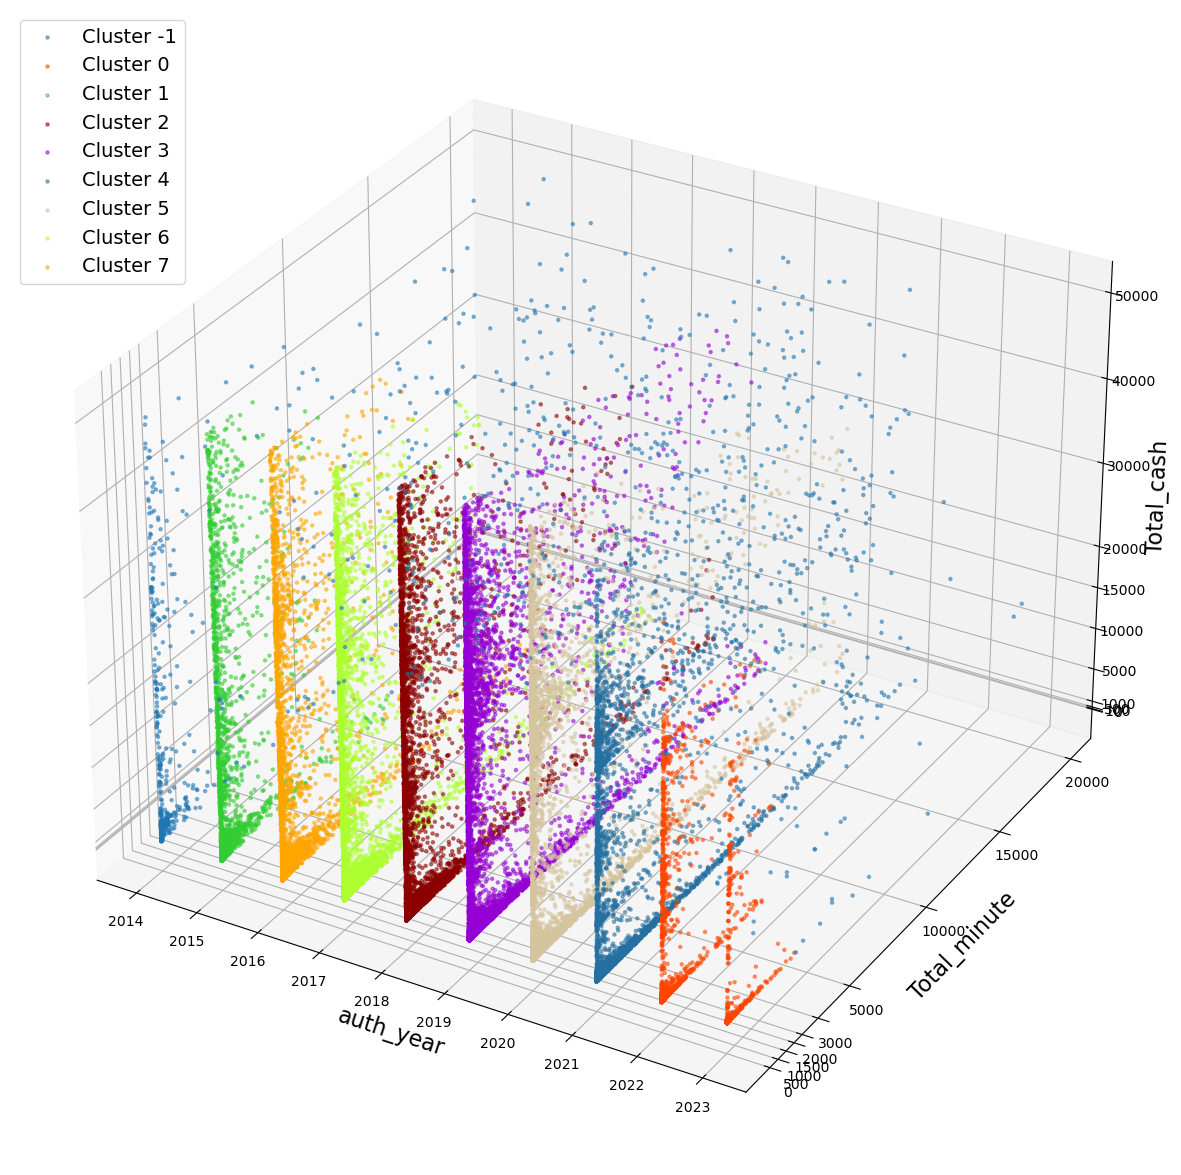

In [30]:
# 使用更为鲜明的颜色组合
colors = [
    "#1f77b4", "#ff4500", "#32cd32", "#8b0000", "#9400d3", "#2570a1", "#d5c59f",
    "#adff2f", "#ffa500", "#4b0082", "#f173ac", "#73b9a2", "#a03939", "#6f599c",
    "#ff1493", "#d2691e", "#00ced1", "#ff69b4", "#ffd700", "#f0dc70", "#007947"
]

# 进一步增加透明度
alpha_value = 0.5

# 保持点的大小
sizes = {cluster: 5 for cluster in df_fil['Cluster'].unique()}

fig = plt.figure(figsize=(20, 15))
dx = fig.add_subplot(111, projection='3d')

for i, label in enumerate(sorted(df_fil['Cluster'].unique())):
    dx.scatter(df_fil[df_fil.Cluster == label].auth_year,
               df_fil[df_fil.Cluster == label].Total_minute,
               df_fil[df_fil.Cluster == label].Total_cash,
               c=[colors[i]],
               label='Cluster ' + str(label),
               s=sizes[label], alpha=alpha_value)

dx.set_xlabel('auth_year', fontsize=16)
dx.set_ylabel('Total_minute', fontsize=16)
dx.set_zlabel('Total_cash', fontsize=16)
dx.legend(fontsize=14, loc='upper left')
dx.grid(True)  # 保持网格

#自定义刻度
xticks = [2014, 2015, 2016, 2017, 2018, 2019, 2020,  2021, 2022, 2023]
yticks = [0, 500, 1000, 1500, 2000, 3000, 5000, 10000, 15000, 20000]
zticks = [0, 100, 300, 1000, 5000, 10000, 15000, 20000, 30000, 40000, 50000]

dx.set_xticks(xticks)
dx.set_yticks(yticks)
dx.set_zticks(zticks)

plt.show()

In [31]:
merged_dataframe.head()

,user_id,follow_time,auth_time,createtime,order_no,paid_cash,create_date,auth_year,follow_year,create_year,action_month,watch_minute,course,broadcast,playback
0,2,2023-03-09 14:36:14,2014-08-03 22:39:25,2014/4/30 09:30:23,2.018123e+14,1.0,2018-12-29,2014.0,2023,2018.0,2021-01,15.17,0,14.17,1
32,2,2023-03-09 14:36:14,2014-08-03 22:39:25,2014/4/30 09:30:23,2.021012e+14,50.0,2021-01-15,2014.0,2023,2021.0,2021-01,15.17,0,14.17,1
64,2,2023-03-09 14:36:14,2014-08-03 22:39:25,2014/4/30 09:30:23,2.018110e+14,1.0,2018-11-02,2014.0,2023,2018.0,2021-01,15.17,0,14.17,1
96,2,2023-03-09 14:36:14,2014-08-03 22:39:25,2014/4/30 09:30:23,2.018122e+14,1.0,2018-12-23,2014.0,2023,2018.0,2021-01,15.17,0,14.17,1
128,2,2023-03-09 14:36:14,2014-08-03 22:39:25,2014/4/30 09:30:23,2.018121e+14,1.0,2018-12-07,2014.0,2023,2018.0,2021-01,15.17,0,14.17,1


In [81]:
merged_dataframe = merged_dataframe[merged_dataframe['watch_minute'] >=30]

In [82]:

df_fil = merged_dataframe.groupby('user_id').agg({
    'paid_cash': 'sum',
    'watch_minute': 'sum',
    'order_no': 'count',
    'auth_year':'first',
    'follow_year': 'first',
    'create_year': 'first',
    'user_id': 'count'
}).rename(columns={
    'paid_cash': 'Total_cash',
    'watch_minute': 'Total_minute',
    'order_no': 'Total_no',
    'user_id': 'f_watch'
})

In [83]:
df_fil

,Total_cash,Total_minute,Total_no,auth_year,follow_year,create_year,f_watch
user_id,,,,,,,
67,1854.00,108.00,3,2014.0,2023,2018.0,3
83,1181.90,8498.00,7,2014.0,2021,2017.0,7
112,1252.01,5083.54,22,2017.0,2022,2018.0,22
119,109869.02,28377.70,65,2017.0,2021,2019.0,65
123,1620.81,875.00,25,2015.0,2020,2018.0,25
...,...,...,...,...,...,...,...
759699,19260.00,296.08,4,2023.0,2023,2023.0,4
760350,3400.00,3113.91,3,2023.0,2023,2023.0,3
760404,25900.00,10624.00,4,2023.0,2023,2023.0,4


In [35]:
# 使用hdbscan进行聚类
df_fil = df_fil[(df_fil['Total_cash'] <= 50000) & (df_fil['f_watch'] <= 100)].copy()
# 数据预处理
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df_fil[['auth_year', 'f_watch', 'Total_cash']])

# 使用优化的参数进行聚类
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=1000,
    min_samples=8, 
    metric='euclidean', 
    cluster_selection_epsilon=0.1, 
    alpha=3.5, 
    cluster_selection_method='eom', 
    algorithm='best')
clusterer.fit(rfm_scaled)
df_fil['Cluster'] = pd.Series(clusterer.labels_, index=df_fil.index)

# 查看结果
print(df_fil['Cluster'].value_counts())

 6    4804
 5    4207
 4    3944
 2    3337
 0    2284
 1    2217
 3    1062
-1     716
Name: Cluster, dtype: int64


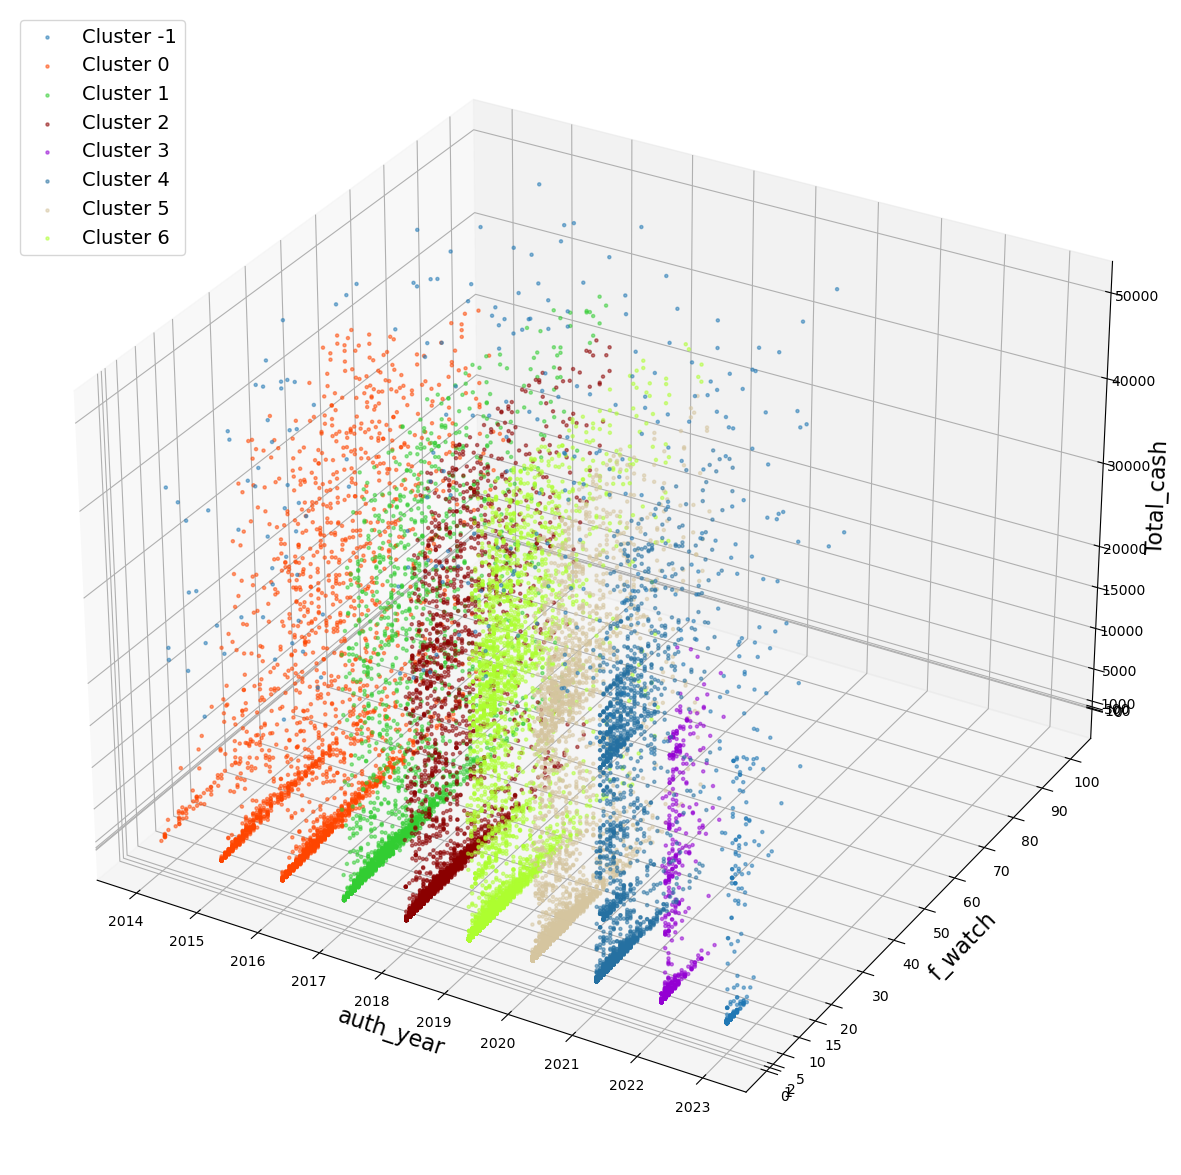

In [36]:
# 使用更为鲜明的颜色组合
colors = [
    "#1f77b4", "#ff4500", "#32cd32", "#8b0000", "#9400d3", "#2570a1", "#d5c59f",
    "#adff2f", "#ffa500", "#4b0082", "#f173ac", "#73b9a2", "#a03939", "#6f599c",
    "#ff1493", "#d2691e", "#00ced1", "#ff69b4", "#ffd700", "#f0dc70", "#007947"
]

# 进一步增加透明度
alpha_value = 0.5

# 保持点的大小
sizes = {cluster: 5 for cluster in df_fil['Cluster'].unique()}

fig = plt.figure(figsize=(20, 15))
dx = fig.add_subplot(111, projection='3d')

for i, label in enumerate(sorted(df_fil['Cluster'].unique())):
    dx.scatter(df_fil[df_fil.Cluster == label].auth_year,
               df_fil[df_fil.Cluster == label].f_watch,
               df_fil[df_fil.Cluster == label].Total_cash,
               c=[colors[i]],
               label='Cluster ' + str(label),
               s=sizes[label], alpha=alpha_value)

dx.set_xlabel('auth_year', fontsize=16)
dx.set_ylabel('f_watch', fontsize=16)
dx.set_zlabel('Total_cash', fontsize=16)
dx.legend(fontsize=14, loc='upper left')
dx.grid(True)  # 保持网格

#自定义刻度
xticks = [2014, 2015, 2016, 2017, 2018, 2019, 2020,  2021, 2022, 2023]
yticks = [0, 1, 2, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
zticks = [0, 100, 300, 1000, 5000, 10000, 15000, 20000, 30000, 40000, 50000]

dx.set_xticks(xticks)
dx.set_yticks(yticks)
dx.set_zticks(zticks)

plt.show()

In [37]:
df_fil[df_fil['Total_cash'] >= 30000].count()

Total_cash      3045
Total_minute    3045
Total_no        3045
auth_year       3045
follow_year     3045
create_year     3045
f_watch         3045
Cluster         3045
dtype: int64

In [84]:
df_fil.to_csv('study_wx_data.csv')

In [79]:
df_fil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43550 entries, 2 to 760849
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total_cash    43550 non-null  float64
 1   Total_minute  43550 non-null  float64
 2   Total_no      43550 non-null  int64  
 3   auth_year     43510 non-null  float64
 4   follow_year   43550 non-null  int64  
 5   create_year   43550 non-null  float64
 6   f_watch       43550 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 2.7 MB
